In [1]:
import pandas as pd
from pandas import read_csv
import matplotlib.pyplot as plt
from datetime import datetime


In [2]:
def parser(x):
  return datetime.strptime(x,'%d-%m-%y')
series = read_csv('/content/drive/MyDrive/inventory control',header=0,parse_dates=[0],squeeze=True,date_parser=parser)
print(series.head())

  invoice_date job_card_date  ... current_km_reading invoice_line_text
0   2017-05-30      30-05-17  ...              50000        ENGINE OIL
1   2017-06-02      31-05-17  ...                758        ENGINE OIL
2   2017-06-02      31-05-17  ...                758            POLISH
3   2017-06-02      31-05-17  ...                758       CONSUMABLES
4   2017-06-02      31-05-17  ...                758       COOLANT OIL

[5 rows x 7 columns]


In [3]:
series.head()

,invoice_date,job_card_date,business_partner_name,vehicle_no,vehicle_model,current_km_reading,invoice_line_text
0,2017-05-30,30-05-17,shivXXXXXXXXXX,KA03MFXXXX,BAJAJ AVENGER STREET 220,50000,ENGINE OIL
1,2017-06-02,31-05-17,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758,ENGINE OIL
2,2017-06-02,31-05-17,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758,POLISH
3,2017-06-02,31-05-17,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758,CONSUMABLES
4,2017-06-02,31-05-17,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758,COOLANT OIL


In [4]:
series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28482 entries, 0 to 28481
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   invoice_date           28482 non-null  datetime64[ns]
 1   job_card_date          28482 non-null  object        
 2   business_partner_name  28482 non-null  object        
 3   vehicle_no             28482 non-null  object        
 4   vehicle_model          28482 non-null  object        
 5   current_km_reading     28482 non-null  int64         
 6   invoice_line_text      28448 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 1.5+ MB


In [5]:
X = series.loc[:,['invoice_date','invoice_line_text']]
#y = series[['invoice_line_text']]

In [6]:
X.head(1)

,invoice_date,invoice_line_text
0,2017-05-30,ENGINE OIL


In [7]:
#y.head(1)

In [8]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

In [9]:
#X.business_partner_name = enc.fit_transform(X.business_partner_name)
#X.vehicle_model = enc.fit_transform(X.vehicle_model)
#y.invoice_line_text = enc.fit_transform(y.invoice_line_text)
X.invoice_line_text = enc.fit_transform(X.invoice_line_text)

In [10]:
X.head(1)

,invoice_date,invoice_line_text
0,2017-05-30,148


In [11]:
#y.head(1)

In [12]:
#from sklearn.model_selection import train_test_split
#X_train,X_test,y_train,y_test = train_test_split(X,y,random_state= 25)

In [13]:
#from xgboost import XGBClassifier
#from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [14]:
#model = XGBClassifier()
#model.fit(X_train,y_train)
#y_predict = model.predict(X_test)
#accuracy_score(y_test,y_predict)

In [15]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')
#print(classification_report(y_test, y_predict, labels=np.unique(y_predict)))

In [16]:
#accuracy_score(y_test,y_predict)

In [17]:
#print(confusion_matrix(y_test,y_predict))

In [18]:
!pip install prophet

In [19]:
from prophet import Prophet

In [20]:
X.head(1)
X.rename({'invoice_date':'ds','invoice_line_text':'y'},axis = 1,inplace=True)

In [21]:
X.head(1)

,ds,y
0,2017-05-30,148


In [22]:
model= Prophet()
model.fit(X)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [23]:
future = model.make_future_dataframe(periods=365)
future.tail()

,ds
915,2020-01-02
916,2020-01-03
917,2020-01-04
918,2020-01-05
919,2020-01-06


In [24]:
future.head()

,ds
0,2017-05-30
1,2017-05-31
2,2017-06-01
3,2017-06-02
4,2017-06-03


In [25]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail() 

,ds,yhat,yhat_lower,yhat_upper
915,2020-01-02,228.510767,61.693687,406.816321
916,2020-01-03,227.305659,53.145468,408.743383
917,2020-01-04,223.261854,57.370144,410.530725
918,2020-01-05,216.702034,39.421981,382.998721
919,2020-01-06,224.635586,64.788035,410.316732


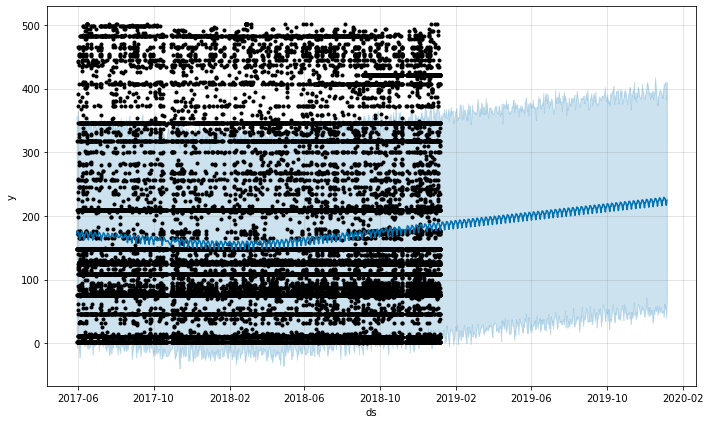

In [26]:
fig1 = model.plot(forecast)


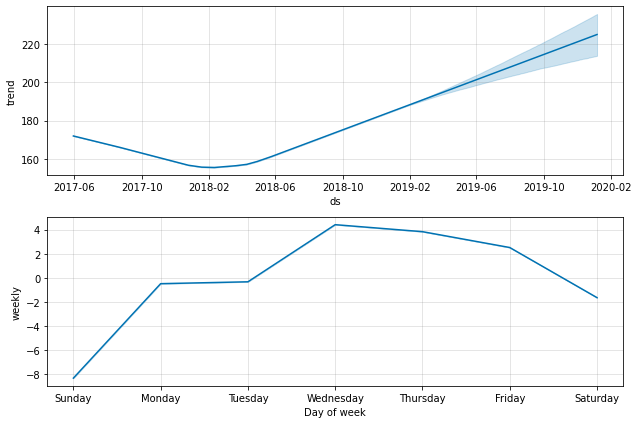

In [27]:
fig2 = model.plot_components(forecast)

In [28]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(model, forecast)

In [29]:
plot_components_plotly(model, forecast)
